In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

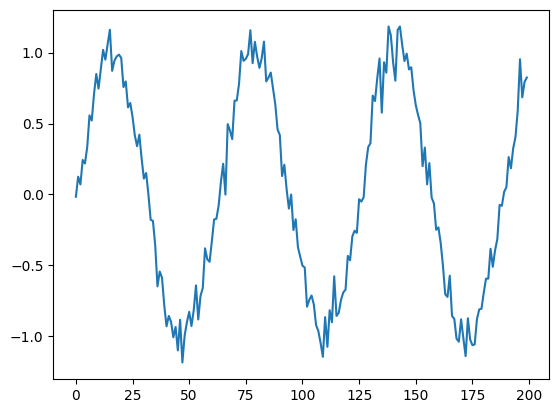

In [9]:
series=np.sin(0.1*np.arange(200))+np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [10]:
# we use T past values to predict the next value
T=10
X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
X=np.array(X).reshape(-1,T)    
Y=np.array(Y)
N=len(X)
print("X.shape",X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [11]:
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.1),)
r = model.fit(X[:-N//2], Y[:-N//2], epochs=80, validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80


c:\Users\DELL\.conda\envs\tfGpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 0s 75ms/step - loss: 0.9590 - val_loss: 0.4695
Epoch 2/80
3/3 [==============================] - 0s 33ms/step - loss: 0.6183 - val_loss: 0.3663
Epoch 3/80
3/3 [==============================] - 0s 25ms/step - loss: 0.1774 - val_loss: 0.1307
Epoch 4/80
3/3 [==============================] - 0s 24ms/step - loss: 0.1707 - val_loss: 0.2001
Epoch 5/80
3/3 [==============================] - 0s 28ms/step - loss: 0.1680 - val_loss: 0.0584
Epoch 6/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0571 - val_loss: 0.1268
Epoch 7/80
3/3 [==============================] - 0s 29ms/step - loss: 0.1015 - val_loss: 0.0795
Epoch 8/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0473 - val_loss: 0.0767
Epoch 9/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0645 - val_loss: 0.1019
Epoch 10/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0560 - val_loss: 0.0568
Epoch 11/80
3/3 [=======================

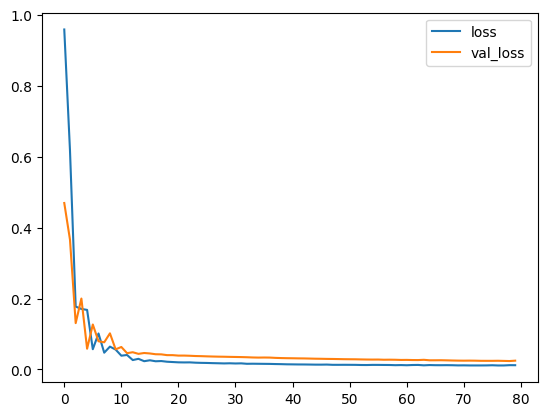

In [12]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [13]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

1/1 [==============================] - 0s 32ms/step


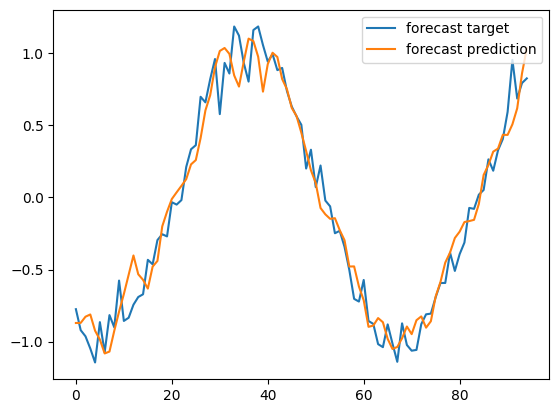

In [14]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [15]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p


1/1 [==============================] - 0s 25ms/step


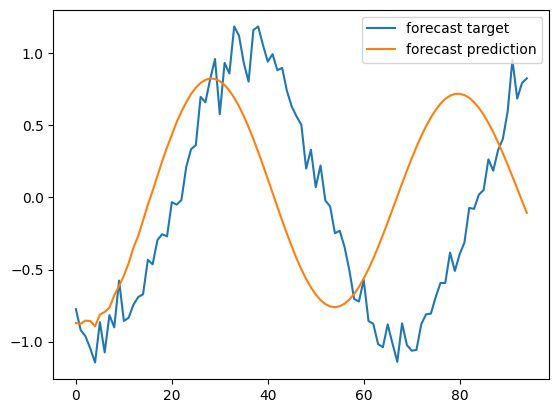

In [16]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()